Our data science problem is, Banks have to develop a machine learning model within 3 months to instantly predict credit card approval instead of waiting for a minimum of 7 days. We have a cleaned data set. Here we are going to explore the data, visualize the relationships between variables and find out patterns and emerging trends.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
df_applicant= pd.read_csv(r'C:\Users\gibib\Desktop\Data Scientist\Springboard-Project-Capstone-2\Credit Card Data\Applicant_data_cleaned.csv')

In [3]:
df_applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  int64  
 3   FLAG_OWN_REALTY      36457 non-null  int64  
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  float64
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [4]:
df_applicant.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CNT_FAM_MEMBERS,No.of X,No.of C,No.of 0,No.of 1,No.of 2,No.of 3,No.of 4,No.of 5,STATUS
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,1,13,1,1,0,0,0,0,BAD CUSTOMER
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,1,12,1,1,0,0,0,0,BAD CUSTOMER
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,2,16,7,7,0,0,0,0,0,GOOD CUSTOMER
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,3,0,2,0,0,0,0,0,GOOD CUSTOMER
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,5,0,0,0,0,0,0,0,GOOD CUSTOMER


In [5]:
#Our target variable is STATUS. 
#To change 'STATUS', 'GOOD CUSTOMER' to 1, 'BAD CUSTOMER'to 0, so that it will be easy to do all calculations.
df_applicant['STATUS'] = df_applicant['STATUS'].map({'GOOD CUSTOMER': 1, 'BAD CUSTOMER': 0})

In [6]:
df_applicant.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CNT_FAM_MEMBERS,No.of X,No.of C,No.of 0,No.of 1,No.of 2,No.of 3,No.of 4,No.of 5,STATUS
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,1,13,1,1,0,0,0,0,0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,2,1,12,1,1,0,0,0,0,0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,2,16,7,7,0,0,0,0,0,1
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,3,0,2,0,0,0,0,0,1
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,5,0,0,0,0,0,0,0,1


In [7]:
#To change data type to int
df_applicant['STATUS'] = df_applicant['STATUS'].astype('int')

In [8]:
df_applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  int64  
 3   FLAG_OWN_REALTY      36457 non-null  int64  
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  float64
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

array([[<Axes: title={'center': 'STATUS'}>]], dtype=object)

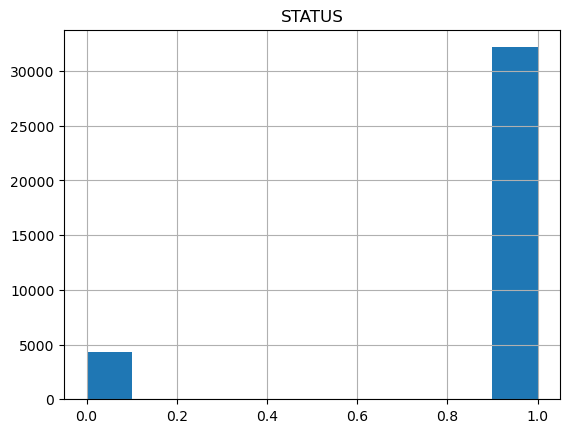

In [9]:
#Plotting the target variable
df_applicant.hist(column="STATUS")

We can see Good customers are more than 30,000 and Bad customers are less than 5000.

In [10]:
#To get the correct count of good and bad customers.
df_applicant["STATUS"].value_counts(dropna=False)

STATUS
1    32166
0     4291
Name: count, dtype: int64

In [11]:
# Call the .corr() method on the wine dataset 
numeric_df_applicant=df_applicant.select_dtypes(include=['number'])
numeric_df_applicant.corr()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,...,CNT_FAM_MEMBERS,No.of X,No.of C,No.of 0,No.of 1,No.of 2,No.of 3,No.of 4,No.of 5,STATUS
ID,1.000000,-0.011163,-0.098851,0.028878,-0.017667,0.056016,0.024013,NaN,0.079215,0.009879,...,0.026624,0.012005,0.014689,-0.007565,0.012049,0.007824,0.009533,0.004985,0.012944,-0.003565
FLAG_OWN_CAR,-0.011163,1.000000,-0.015185,0.105839,0.215506,0.157144,0.065631,NaN,0.021644,-0.014019,...,0.151814,0.021517,0.009132,0.026810,-0.004672,0.002657,0.001905,-0.001369,0.002726,0.010580
FLAG_OWN_REALTY,-0.098851,-0.015185,1.000000,-0.000575,0.032719,-0.129838,-0.005823,NaN,-0.207732,-0.066601,...,-0.005723,-0.017866,-0.016362,-0.022341,-0.030883,-0.019634,-0.018081,-0.009309,0.003495,0.027990
CNT_CHILDREN,0.028878,0.105839,-0.000575,1.000000,0.033691,0.339357,0.058297,NaN,0.048091,-0.016291,...,0.889114,0.000168,-0.005836,-0.000295,0.014590,0.001114,-0.008076,0.000362,-0.000664,-0.011525
AMT_INCOME_TOTAL,-0.017667,0.215506,0.032719,0.033691,1.000000,0.067908,-0.018421,NaN,-0.037746,0.017245,...,0.023750,0.028214,-0.014529,0.040184,0.016124,-0.001950,-0.000396,0.009132,0.005801,-0.024202
DAYS_BIRTH,0.056016,0.157144,-0.129838,0.339357,0.067908,1.000000,0.259715,NaN,0.179054,-0.028659,...,0.304020,-0.005014,-0.029536,-0.046100,0.035940,0.006386,-0.011213,0.006074,-0.011158,-0.028943
DAYS_EMPLOYED,0.024013,0.065631,-0.005823,0.058297,-0.018421,0.259715,1.000000,NaN,-0.010814,-0.044354,...,0.042072,-0.024578,-0.041053,-0.052534,0.004199,0.020558,0.017796,0.019673,0.010365,-0.004274
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,0.079215,0.021644,-0.207732,0.048091,-0.037746,0.179054,-0.010814,NaN,1.000000,0.311644,...,0.064527,0.021532,0.007503,0.002168,0.009723,0.016708,0.008774,0.008265,0.006275,0.000149
FLAG_PHONE,0.009879,-0.014019,-0.066601,-0.016291,0.017245,-0.028659,-0.044354,NaN,0.311644,1.000000,...,-0.004221,0.024508,-0.006001,0.018637,-0.001253,-0.003199,0.008152,0.010914,0.010266,0.006355


These shows the correlations.It will be more easy to understand the correlation between the variables, if it is represented visually.

In [12]:
df_applicant['FLAG_MOBIL']

0        1
1        1
2        1
3        1
4        1
        ..
36452    1
36453    1
36454    1
36455    1
36456    1
Name: FLAG_MOBIL, Length: 36457, dtype: int64

All values in this column are identical (likely all 1), so its variance = 0. So NaN appears in correlation because that feature has NO variation.

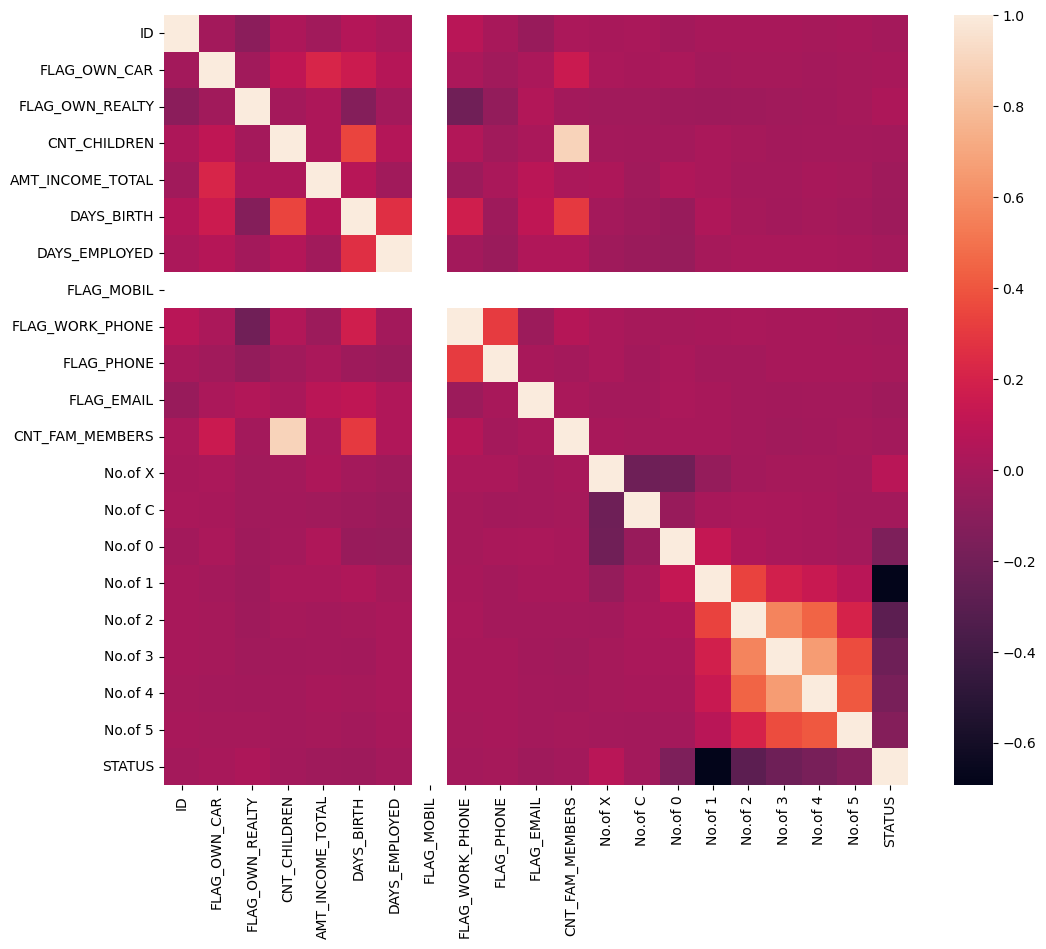

In [13]:
#To represent the correlation visually
plt.subplots(figsize=(12,10))
sns.heatmap(numeric_df_applicant.corr());

Here most of the features are not very much related with others. STATUS column shows some relation with count of No. of 1.

In [14]:
# define useful function to create scatterplots of STATUS against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = 'STATUS', y = col, data=df_applicant, alpha=0.5)
        ax.set(xlabel='Status', ylabel=col)
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [15]:
#Code task 13#
#Use a list comprehension to build a list of features from the columns of 'df_applicant` that
#are _not_ any of 'ID','CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE' ,'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE' or 'STATUS'.
features = [col for col in df_applicant.columns if col not in ['ID','CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE' ,'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'STATUS' ]]

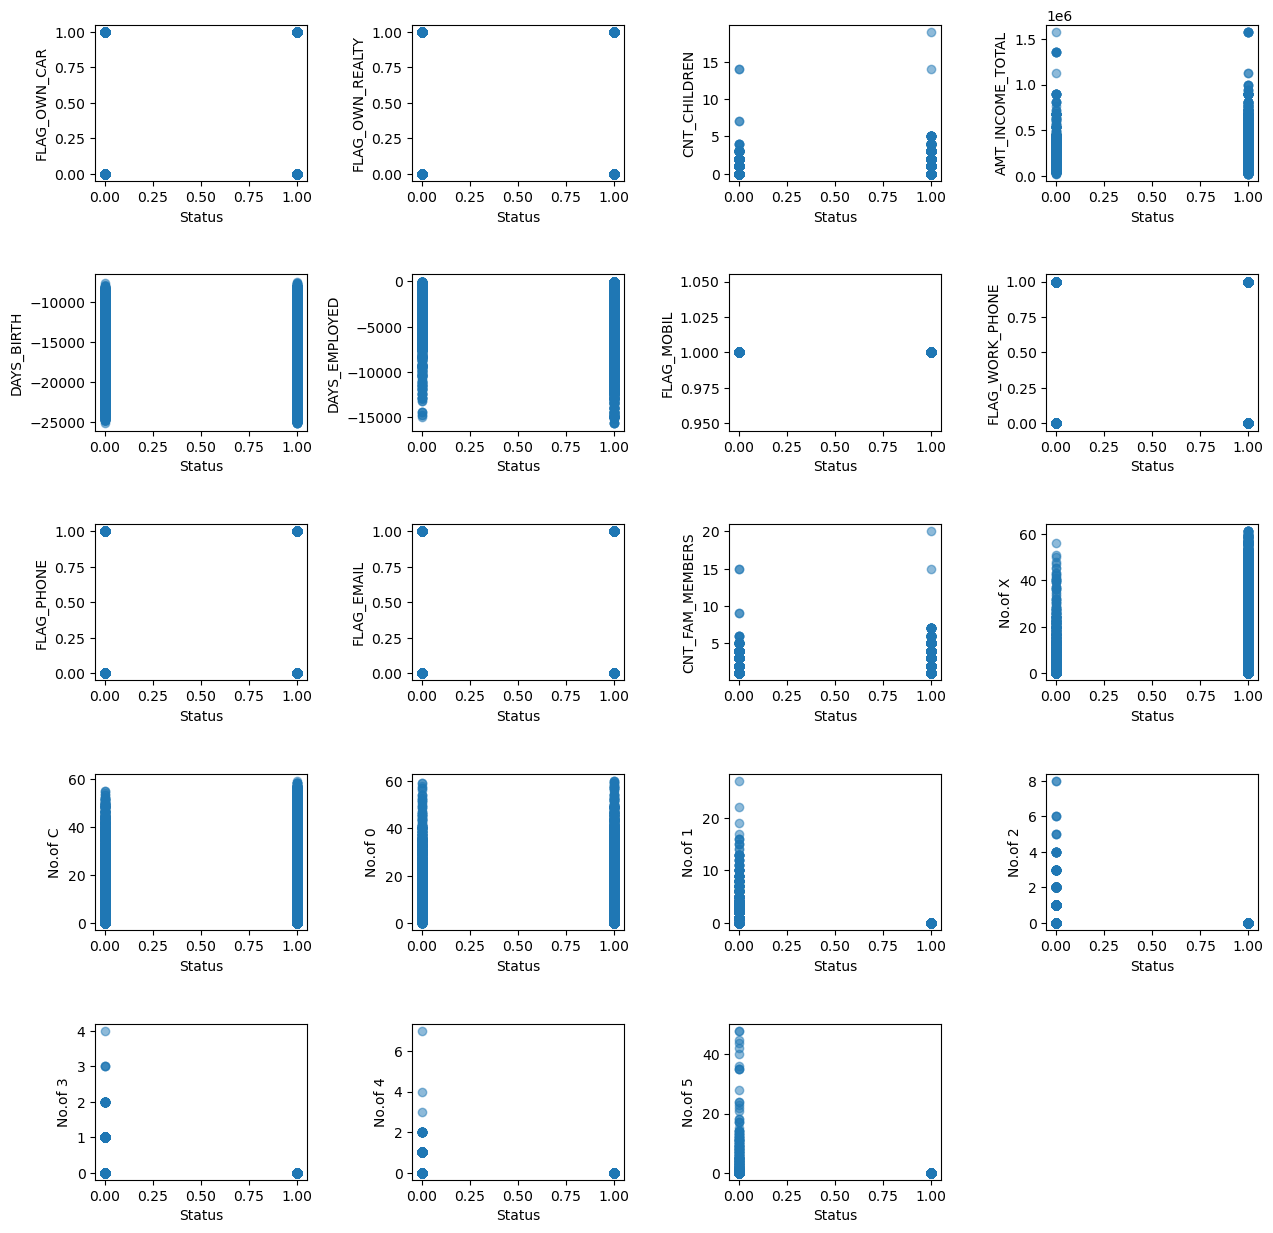

In [16]:
#Plotting scatterplots
scatterplots(features, ncol=4, figsize=(15, 15))

Here also most of the features are not very much positively related with STATUS column. STATUS column have to be 1 or become 1 when other features value increase or decrease. Then only we can say STATUS column is related with any other columns. STATUS column shows only related with No of X,C 0,1,2,3,4 and 5.

To understand more about how No of X,C and 0 affects STATUS, we can now plot them based on different conditions.

<Axes: xlabel='STATUS', ylabel='No.of X'>

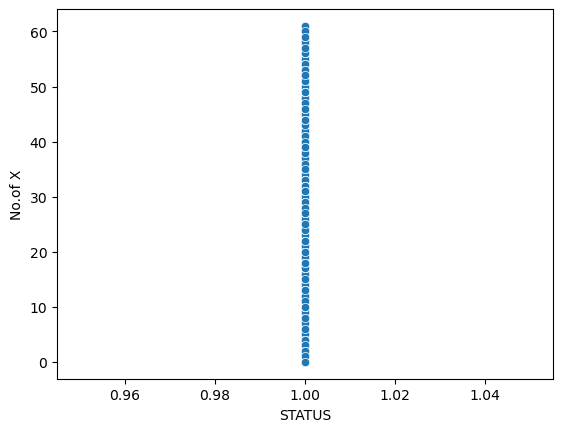

In [17]:
#Scatterplot of No. of X versus STATUS, when the applicant do not had an history of more than 29 days due.
sns.scatterplot(
    x='STATUS',
    y='No.of X',
    data=df_applicant[
        (df_applicant['No.of 1'] == 0) &
        (df_applicant['No.of 2'] == 0) &
        (df_applicant['No.of 3'] == 0) &
        (df_applicant['No.of 4'] == 0) &
        (df_applicant['No.of 5'] == 0)
    ]
)

<Axes: xlabel='STATUS', ylabel='No.of C'>

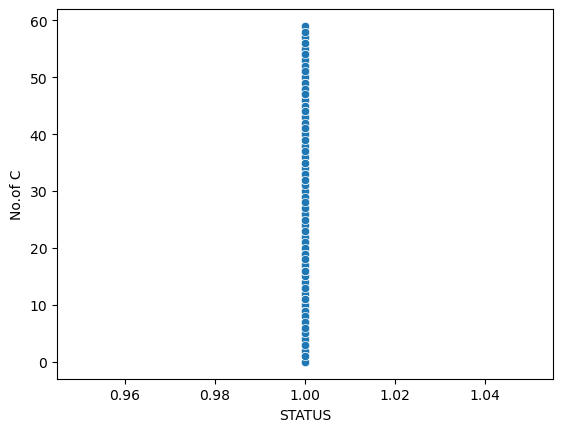

In [18]:
#Scatterplot of No. of C versus STATUS, when the applicant do not had an history of more than 29 days due.
sns.scatterplot(
    x='STATUS',
    y='No.of C',
    data=df_applicant[
        (df_applicant['No.of 1'] == 0) &
        (df_applicant['No.of 2'] == 0) &
        (df_applicant['No.of 3'] == 0) &
        (df_applicant['No.of 4'] == 0) &
        (df_applicant['No.of 5'] == 0)
    ]
)

<Axes: xlabel='STATUS', ylabel='No.of 0'>

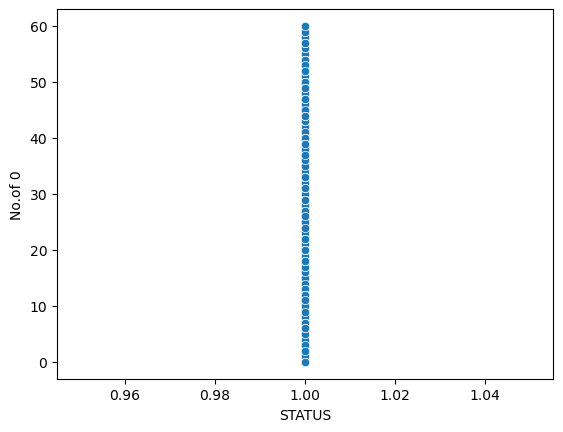

In [19]:
#Scatterplot of No. of 0 versus STATUS, when the applicant do not had an history of more than 29 days due.
sns.scatterplot(
    x='STATUS',
    y='No.of 0',
    data=df_applicant[
        (df_applicant['No.of 1'] == 0) &
        (df_applicant['No.of 2'] == 0) &
        (df_applicant['No.of 3'] == 0) &
        (df_applicant['No.of 4'] == 0) &
        (df_applicant['No.of 5'] == 0)
    ]
)

It means customers who are having more than 29 days loan due history atleast for 1 time are bad customers. Customers who do not had a loan or/and paid all loans or/and having less than 30 days loan due is considered as good customers.

<Axes: xlabel='STATUS', ylabel='AMT_INCOME_TOTAL'>

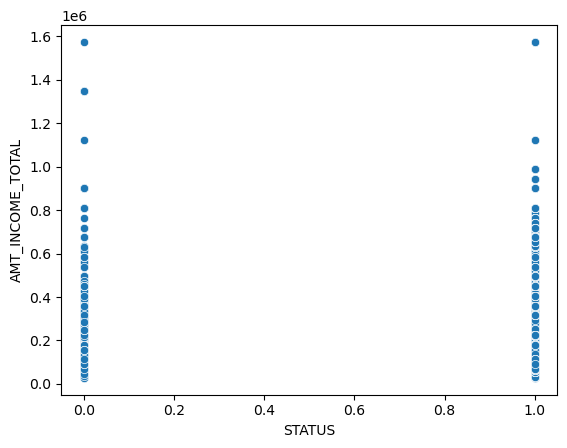

In [20]:
#Checking whether total income had a role in determining good or bad customers.
sns.scatterplot(
    x='STATUS',
    y='AMT_INCOME_TOTAL',
    data=df_applicant)

It shows total income do not influence in determining good or bad customers. Both good customers and bad customers include those having high , low or medium income.

<Axes: xlabel='STATUS', ylabel='NAME_INCOME_TYPE'>

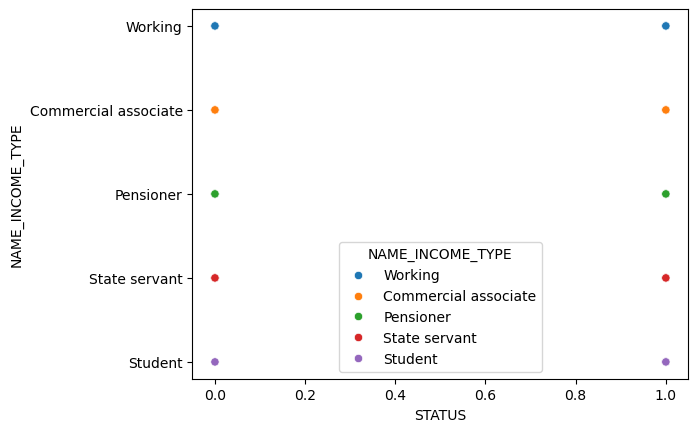

In [21]:
#Checking whether non-numeric, INCOME_TYPE had a role in determining good or bad customers.
sns.scatterplot(
    x='STATUS',
    y='NAME_INCOME_TYPE',
    hue='NAME_INCOME_TYPE',
    data=df_applicant)

<Axes: xlabel='STATUS', ylabel='NAME_EDUCATION_TYPE'>

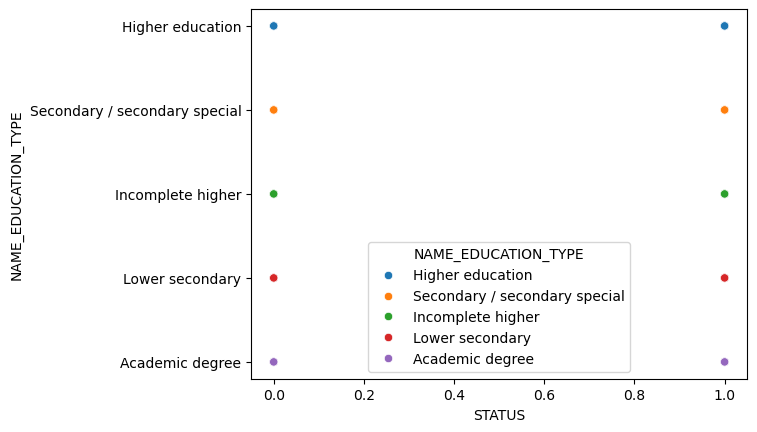

In [22]:
#Checking whether non-numeric, EDUCATION_TYPE had a role in determining good or bad customers.
sns.scatterplot(
    x='STATUS',
    y='NAME_EDUCATION_TYPE' , 
    hue='NAME_EDUCATION_TYPE',
    data=df_applicant)

<Axes: xlabel='STATUS', ylabel='NAME_FAMILY_STATUS'>

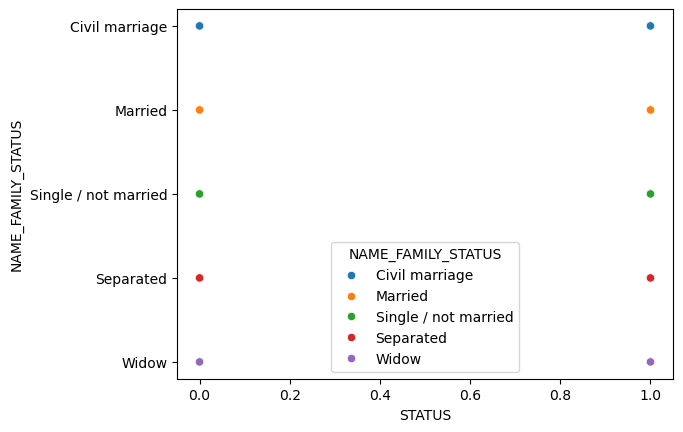

In [23]:
#Checking whether non-numeric, FAMILY_STATUS had a role in determining good or bad customers.
sns.scatterplot(
    x='STATUS',
    y='NAME_FAMILY_STATUS',
    hue='NAME_FAMILY_STATUS',
    data=df_applicant)

<Axes: xlabel='STATUS', ylabel='NAME_HOUSING_TYPE'>

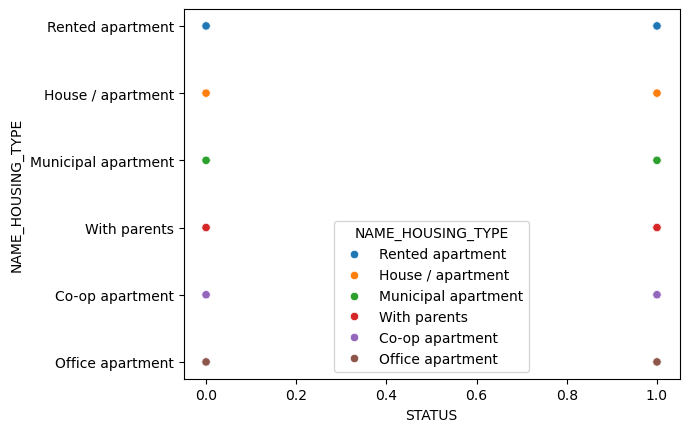

In [24]:
#Checking whether non-numeric, HOUSING_TYPE had a role in determining good or bad customers.
sns.scatterplot(
    x='STATUS',
    y='NAME_HOUSING_TYPE',
    hue='NAME_HOUSING_TYPE',
    data=df_applicant)

So, from the above scatterplots, it is clear that non-numeric category features such as 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE' are having no influence in determining good or bad customers.

In [25]:
df_applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  int64  
 3   FLAG_OWN_REALTY      36457 non-null  int64  
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  float64
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [26]:
# save the data to a new csv file
df_applicant.to_csv(
    r'C:\Users\gibib\Desktop\Data Scientist\Springboard-Project-Capstone-2\Credit Card Data\Applicant_data_explored.csv',
    index=False
)

SUMMARY:
At this Exploratory Data Analysis step of the project, I explored the data, visualize the relationships between variables and find out patterns and emerging trends. Our target variable was STATUS.  So  'STATUS' was updated, 'GOOD CUSTOMER' to 1, 'BAD CUSTOMER' to 0, so that it will be easy to do all calculations. Also the datatype was changed to int. We can see Good customers are more than 30,000 (32166) and Bad customers are less than 5000(4291) by plotting the histogram. We then started to check the correlations between the variables. We use .corr() method, plotted a heatmap and plotted scatterplots. When used .corr() method and heatmap most of the features were found not very much related with others except STATUS column and No. of 1. When used scatterplots to find the relationship between features and STATUS column, most of the features are not very much positively related with STATUS column. STATUS column have to be 1 or become 1 when other features value increase or decrease. Then only we can say STATUS column is related with any other columns. STATUS column shows only related with No of X, C 0,1,2,3,4 and 5. When do more detailed visualizations, found that customers who are having more than 29 days loan due history atleast for 1 time are bad customers. Customers who do not had a loan or/and paid all loans or/and having less than 30 days loan due is considered as good customers. From the other scatterplots, it is clear that income and other non-numeric category features such as 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE' are having no influence in determining good or bad customers. So from these observations, we can conclude that the main factors to determine the status of customers(target variable) are No.of X,C,0,1,2,3,4 and 5.